In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
from PSO_algo import Particle
from PSO_algo import PSO

In [3]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()
number_Brazil_strain = len(np.array(Brazil.strain))
strain_number = len(Nepal.strain) # = 69
Nepal_strain = np.array(Nepal.strain)
Nepal_cases = np.array(Nepal.cases)

#mu value of Nepal
mu = 6

#import Brazil alpha & data
Brazil_alpha = np.loadtxt(open("Brazil_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Brazil_strain = np.array(Brazil.strain)

#import Denmark alpha & data
Denmark_alpha = np.loadtxt(open("Denmark_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Denmark_strain = np.array(Denmark.strain)

#import Mozambique alpha & data
Mozambique_alpha = np.loadtxt(open("Mozambique_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Mozambique_strain = np.array(Mozambique.strain)

#import Iran alpha & data
Iran_alpha = np.loadtxt(open("Iran_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Iran_strain = np.array(Iran.strain)

In [4]:
# initiate matrix Nepal_alpha
Nepal_alpha = np.ones((strain_number, strain_number))*50

for xN, strain_xN in enumerate(Nepal_strain):
    for yN, strain_yN in enumerate(Nepal_strain):
        #insert from Brazil
        find_xBrazil = np.where(Brazil_strain == strain_xN)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain == strain_yN)
        index_yBrazil = find_yBrazil[0]

        #insert from Iran
        find_xIran = np.where(Iran_strain == strain_xN)
        index_xIran = find_xIran[0]

        find_yIran = np.where(Iran_strain == strain_yN)
        index_yIran = find_yIran[0]

        #insert from Denmark
        find_xDenmark = np.where(Denmark_strain == strain_xN)
        index_xDenmark = find_xDenmark[0]

        find_yDenmark = np.where(Denmark_strain == strain_yN)
        index_yDenmark = find_yDenmark[0]

        #insert from Mozambique
        find_xMozambique = np.where(Mozambique_strain == strain_xN)
        index_xMozambique = find_xMozambique[0]

        find_yMozambique = np.where(Mozambique_strain == strain_yN)
        index_yMozambique = find_yMozambique[0]


        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Nepal_alpha[xN, yN] = Brazil_alpha[index_xBrazil, index_yBrazil]
        elif index_xIran.size > 0 and index_yIran.size > 0:
            Nepal_alpha[xN, yN] = Iran_alpha[index_xIran, index_yIran]
        elif index_xDenmark.size > 0 and index_yDenmark.size > 0:
            Nepal_alpha[xN, yN] = Denmark_alpha[index_xDenmark, index_yDenmark]
        elif index_xMozambique.size > 0 and index_yMozambique.size > 0:
            Nepal_alpha[xN, yN] = Mozambique_alpha[index_xMozambique, index_yMozambique]

np.savetxt('fix_alpha_Nepal.txt', Nepal_alpha, delimiter = ',')

In [5]:
#find the length of vector that we need to fit the matrix Nepal alpha
length = 0

for i in range(0, strain_number):
    for j in range(0, strain_number):
        if Nepal_alpha[i,j] > 49:
            length += 1

print(length)
#so we need to fit the matrix Nepal

2860


In [6]:
#find the coordinate of missing alpha_ij in alpha_matrix
position = []
count = 0

for i in range (0, strain_number):
    for j in range (0, strain_number):
        if Nepal_alpha[i,j] > 49:
            position.append(np.array([i,j]))
            count += 1

In [7]:
#cost function for PSO
u0 = 1/strain_number*np.ones(strain_number) #vector of all ones

def func(vector):
    # insert alpha vector to Nepal_alpha
    alpha_matrix = np.loadtxt(open("fix_alpha_Nepal.txt","rb"), delimiter = ",", skiprows = 0)

    for i in range (0, length):
        coordinate = position[i]
        alpha_matrix[coordinate[0], coordinate[1]] = vector[i]

    #compute invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    #compute right-hand-side of replicator equations
    solution = Replicator(strain_number, lambd, 50, u0)
    err = np.linalg.norm(solution - Nepal_cases)

    return err

In [8]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length
#print(func(initial))

#time consuming ~72h

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

PSO(func, initial, bounds, num_particles = 3000, maxiter = 2000)

FINAL:
[-0.7813605186870325, 0.21449149708825851, -0.6242588790705342, 0.378677018143787, -0.32267015611775585, 0.4365735201937845, -0.3848328429146016, -0.07044405627716831, -0.7351183157316872, 1.6697723906254882, -0.42237371749752767, -0.7754711678933015, -0.008844587912145985, -0.9356550525031815, -0.15454489462964938, -0.4880189392763732, -0.6835989997372858, 1.243842424355528, 0.23349725340054583, 0.6906137003220972, -1.5082857558630716, 1.6717678216788008, 2.1735141654345136, 1.3171738586126764, -0.919009666774256, 1.6938478986864227, 0.02334086788436038, 0.4410068215789003, -0.49485372541788913, -0.08006169651887526, 1.6364981811165373, -0.07666748638524092, -0.049193305710401064, 0.8383542348828017, 1.1085470583685422, 0.6967876551159925, 0.18565752062020283, -0.16132617795416823, 0.2929832645395806, 0.549988600514105, -0.8876218002241574, -0.39290542001485024, 0.3399002270167613, 0.3158846496809391, 0.010599767357445543, -0.35780744231085626, -0.24451819987628068, 0.495199667

In [9]:
opti_Nepal = [-0.7813605186870325, 0.21449149708825851, -0.6242588790705342, 0.378677018143787, -0.32267015611775585, 0.4365735201937845, -0.3848328429146016, -0.07044405627716831, -0.7351183157316872, 1.6697723906254882, -0.42237371749752767, -0.7754711678933015, -0.008844587912145985, -0.9356550525031815, -0.15454489462964938, -0.4880189392763732, -0.6835989997372858, 1.243842424355528, 0.23349725340054583, 0.6906137003220972, -1.5082857558630716, 1.6717678216788008, 2.1735141654345136, 1.3171738586126764, -0.919009666774256, 1.6938478986864227, 0.02334086788436038, 0.4410068215789003, -0.49485372541788913, -0.08006169651887526, 1.6364981811165373, -0.07666748638524092, -0.049193305710401064, 0.8383542348828017, 1.1085470583685422, 0.6967876551159925, 0.18565752062020283, -0.16132617795416823, 0.2929832645395806, 0.549988600514105, -0.8876218002241574, -0.39290542001485024, 0.3399002270167613, 0.3158846496809391, 0.010599767357445543, -0.35780744231085626, -0.24451819987628068, 0.4951996679006987, 0.30663670398548104, -0.6817560355714425, -0.7201233990801703, 0.13505325217297462, -0.2153753185452678, 1.108305667898329, -0.9714940403403189, 0.1967506058111665, -1.092895347025389, -1.741392581880137, 1.2620042033614514, 0.5588054340505919, 0.7704972031152351, -0.5157116281320034, 0.46759050963251775, 1.2613713429316442, 0.5267478888649914, -2.585038334273811, 0.7546248704807441, 0.49016608352740226, -0.9899499520223108, -1.0522722952125096, 0.7735741692344387, -0.6327098841943336, 1.3173647826088117, -0.8363505754184591, -0.4637380847388365, 0.03131842741626366, 0.10352265423847593, 0.7931719973532936, -0.5327958628448889, 0.27394788645549767, -0.5127518839622945, 0.31163717302035004, -0.5586069768630207, -1.9314041767188606, 0.03369717227926516, 1.5888221981672428, -0.4436074418357115, -0.2823955139777336, 0.6698877047879106, -0.1365424941272263, 0.4286797314205397, 0.48922661148267793, -1.9369868729907025, -0.024573677155506544, -1.2650468645121422, 0.20091007950294512, -0.4366541974289547, -0.9727194442144568, 0.7871372151634389, -0.18411844873490907, -0.19943747607712073, -0.9736807008409843, 0.3721087800847951, 1.3138234909679578, -0.14272533298685552, -0.10320417574644707, -0.7487284707244456, -0.32177471937872526, 0.0522288582199823, -1.356260256976491, -0.40799082121639346, 0.6294414747582177, 0.1645843189524841, 0.20584160056223624, 1.1196038667044357, -0.7782516574561849, -0.9528951351761842, 0.03185749909437162, 0.23711446434422742, 1.3019785926123553, -0.5534976502566197, 0.8933052078035879, -1.259032055023868, -0.030471880532824135, 1.0710608028626527, 0.8790469978205518, 0.34842625488274187, 0.36517932235299166, -0.28751466096829364, -0.806962301262519, -0.8293175930413165, 1.4830727915857946, -0.981095024178853, -0.32720064396549997, -0.44364720138617036, -0.2322591468293835, 1.1199467701115404, 0.1880670671062129, -0.5881676036992881, 1.7370338524794509, 0.8062464551928085, -0.0699261931095223, -1.3204558078415236, 0.41810431236097867, -1.0669297250136727, 0.2314437164940461, 0.7392095493339875, 1.1387083244913887, -0.9152019038433529, -0.09450401345519024, 0.9828751917368036, -0.5881657271441627, 0.7000744005546428, -0.7840904500758713, -0.7168201554230367, 0.6069502696207344, -2.0179401665262677, -0.6003043765027668, 0.465392461757177, 1.4001734747733596, 1.4974196049464392, -0.25983293514261113, 1.3906075660702861, -0.484126086439903, 1.3391407439795906, -1.0165210862348668, 0.22309260854435392, 1.1711447444522787, 0.0963419164514871, -0.2074303404777345, -0.4197522798805001, 0.10200874989386391, -0.2246442466681282, -0.1516592767783659, 0.6946967397464047, -0.22759933126899806, 0.3057623986022711, 0.17599627738088258, -0.6451201159682775, -0.48473359727556165, 0.16542762299341485, -0.7971041853453774, -0.06662846388446607, 0.7683302001628791, 0.5708786956671522, 0.6371605741815829, -1.8126559832650626, -0.6202394989215994, 0.6226811966032746, -1.197721281179226, -1.1366593342403832, -0.13247506171915607, 0.9985353805942268, -0.11128513941793368, 0.4938423924090214, -0.32965636900537904, 0.2041383790088922, -0.047548471231682016, 0.09217176533504347, 0.6584401221539894, 0.6954602691633883, 0.267652423511194, 0.5830780288622505, -1.4839185719469472, 0.026227188269395872, -0.4607297474795343, 2.494033773203409, -1.244586686347825, -1.7706862317165446, -3.399786407211166, 0.45180711833325937, 1.1960418077437238, -1.0563418493404295, -0.11478690701703621, 0.05385665085773605, -0.6693079589017736, -1.1215913479493966, 0.80397431796919, -0.6957846704618452, -1.0663203305762579, 0.11388159495730778, 0.32045350412786766, -1.3688327560211768, -0.09781042660225478, 0.25475057436480325, -0.5609945662583836, -0.341950749500714, 0.10878792156088772, -0.5433532086749814, 0.18147830011868815, 0.14741600668220584, -0.19071763810006218, -0.2532251260189888, -0.8128407100861296, 1.7805034715937516, 0.4272630883556469, 0.7345999956164148, -1.7794723977067801, 0.3077285480095709, -0.3226170191208628, -0.8233854160317076, 2.7996489129556656, 0.7493234001806923, -0.4314937394487006, 0.016377021980962227, -1.471933783640238, -0.43209796079138196, -3.6192167656118484, 0.6122511752584404, 0.6603036438859682, -0.9100613694382518, -0.4567321764780717, 0.49710907844066365, -0.16093865365466262, -0.590373786555554, -0.26567956596232767, -0.7673140809681225, -0.34677737993062857, -1.0978747015154986, 0.25265825014635207, -0.14816291575961815, -0.5847511603221254, 0.12477821917157013, -0.7169686794322638, 1.1806244779164055, -2.103244880280066, 0.35180676320883014, 0.632114681412818, 0.07136269709939722, 0.22507158861348295, -0.9455780409573101, -0.06820763210872637, 0.823844372834117, -0.48506625356461425, -0.3409765952712919, -0.12213517842310573, -1.359867211858424, -0.5045182094500882, -0.18563259917295746, 0.9286312919245552, -1.6035902557696495, 0.8831482060190633, -0.023976730440004642, 1.2947652923354485, -1.3379473074693957, 1.0380454655106275, 0.3173894651841178, -0.0015797027826844005, -2.2065496093560943, 2.497666110727028, -0.7366316405282843, 1.1554229433962557, -0.41360792234907223, 0.8996282704693246, -0.7221834396499248, 0.10705527602731989, -0.3099422024580735, 0.4239258552836152, -0.37568695000843855, 0.03327574894700337, -0.8448923569320154, -2.0010031576131566, -1.9309275346768566, -0.5187880954291297, -3.0607415960128503, 0.45669118226800687, 0.28554101094219514, -0.2604963041455343, -2.117769481443668, -0.21646392243164778, 1.8395554329096382, -0.663284877483636, 0.7476227846234653, 0.539887288493253, 0.24927770498878674, 0.5696423508189749, 1.1857109585960408, 1.4748262521668603, 0.3763997464437332, 0.8358573998829716, 0.8732896337449866, 0.5349889599474069, 0.2017179488136698, 0.7835307890229697, 0.9354119453356846, -0.8524035962193656, -0.21916979713549, 0.0645598555168813, -1.8357042490071487, 0.039659076131996644, -0.16529835518997774, -0.7950525210281613, -1.4327462782632554, -0.10955591630836081, 0.6980162465120195, 0.3093281722365736, 1.4144466896227255, 0.14848102944267566, -0.5072890739665303, -1.3694712839130396, 0.3322458232571661, 0.3582529537378556, 0.6249373175578059, 0.6505807097062541, -0.6696672204371199, 0.3752880733045074, -0.5753909991062847, 0.10269721054380303, -1.1049414552971917, 1.458685807269839, -0.017210208228691265, -1.1571959164215397, -0.660074268454094, -0.7352503986985953, -0.05260672647570962, 0.8934581531083461, 0.4515953793185656, 0.5712236466612991, -0.7770891051672565, -1.1264376477511728, 1.3071355302749483, 0.623899605604017, -0.40169143417176545, 1.0642975382469306, -1.499184113040802, -0.7684112428871587, -0.8025377202936028, 0.49085049663807273, -0.5778014311276557, -0.41887821245500667, -0.49972341884461663, -1.3334807665469643, -0.427268216749065, 0.5136840565062369, 1.3380681591658028, 0.7311336414189252, -0.5213353136891086, 0.12131982774936868, 0.3298469593627331, 0.10380985452262449, -0.9346392910605416, -1.4642423733615664, -0.6087032482302239, -1.2743693227051178, -0.5369138083423608, -0.7339303561277758, 0.24229861661357094, -0.023969611147894105, -0.5908033949321864, 0.3034273091655083, 0.9308710755122326, -0.24079231429640804, -0.2753351887451839, 0.22874182513616342, 0.15304932025079554, 0.8019679774491542, 0.012902396563559385, 1.471845140572897, -0.05142401664562288, -0.1562369537865362, -1.1357937456541498, 0.48989679611805453, 0.17966422746385052, -0.24138431793221551, -0.018400073144031824, -0.24280120096511568, 0.5829844416334076, -1.0967769819236295, 2.16528655418811, -0.4024937252634248, 0.9004342919574826, -0.22965618750916592, -2.2681784322705165, 0.7535278412723173, -0.2397287975126032, -0.9214301614340181, 0.6601817182645692, 0.5264192653954345, 0.48307315249232186, 1.5097452414089423, -0.021569912854351763, 1.339630002425166, -1.7567292073418976, -0.5724914390072834, -0.765292483385298, 0.040567318119736386, -0.20592210722476018, -0.31806554364672507, -0.11922707449097115, -0.2695982991827935, 0.5212441750511845, 0.25685466635772064, -2.102573111488204, 0.11182918345287218, 0.49442965840059305, 0.7528204855953926, -1.0652194768812935, 1.3475943292210648, 2.715218063809261, -0.30633853441632225, 0.315818833664793, 0.4645853791656127, 0.6377562939797097, -1.058987206427867, 0.03047123799056506, 0.3946053365893519, 1.0067217160983295, 0.29689490387549655, -0.46390682060732374, -0.6856285559315751, -0.16476121900028676, 0.9995985035743391, 0.2789901220136355, -0.07126736638450026, 2.698819836715593, 0.37678236751584576, -1.4790940848029521, 0.866666460636568, -0.48060626237371584, 0.036910198544973155, -1.1949991765254733, -0.3473369586924434, 0.8753565890626953, -0.12434098178521952, 0.18474614430178044, 0.15387705067723423, 0.42119157397851364, 0.5952507419904994, -0.3455580898779512, -0.29625250285538973, 0.5787927696863759, 2.4285783204184552, -0.6724670182571024, 1.17137928270091, 0.9988888482486429, -0.05804194691263075, 0.16606325073811254, 0.6599159685617216, -1.3792388931343558, 0.30293104087810535, -2.44219846022871, 1.1193243094085519, 1.085381693192022, 0.3495258801511378, 1.6357779992417687, 0.026066852291346376, -1.747541258654187, -0.07893578741182415, 0.7644055092845243, 0.5723110293387934, -1.5673935193275894, 0.6323233473593765, 0.07455461678503462, 0.6478653305063837, 0.803594859647241, 0.09956740153907852, 0.45725198147403046, 0.4749827788550836, 0.41364859210950977, -2.0169230683186705, -0.5183866719816801, 0.7225275054126796, 0.41007553236789135, 0.6826292335342813, -1.3716701891808067, -0.878778982016084, -0.4417741499469992, -0.5314126233122534, -1.2148901488874908, -0.5038982753411784, 0.6063705241581773, 0.1791911638797207, -0.7127365601623605, 0.0966952683229343, 0.8556956005199399, 0.4714536138994553, 0.7615533690469282, 0.4954210779789981, -0.5133480846656177, 0.2223273466754569, 0.38457899376505933, -0.7634769269738831, 0.8169054854803602, -0.3992530037192577, 0.4365031204403126, 0.7777248357394746, -0.07790987610194024, -1.0583216128421407, 1.2740864116969717, 0.8748120062810186, 0.8131669050297514, 2.3113838103880946, -0.12836979909578405, -1.0016236140610322, -1.0645606769244484, -1.2305439597042298, 0.07336466247921562, -0.2826714092652374, -0.28265536302557986, 0.45268345712442193, 1.519527029148195, -0.14446850820669851, -0.22943216462786337, -0.3480201492590281, 1.4984937494056318, -0.9242300676922167, 0.4175336869361909, -0.5055102234819344, 0.2869160695352601, -0.5075272428100345, -0.9364779124390502, -0.6376925631351135, -0.8660063252638555, -0.022727116040481703, -0.5612873463838061, 0.6634967071052593, -0.0708239469782673, -0.16021602530790374, -0.032628823300412474, 0.6313231806985992, 0.9076964953191252, 0.7583098679807276, 0.3153198559111068, 0.27996687143610505, -1.2852156438295765, 0.6769099410458498, 0.1508666989424164, 1.523353002819419, 1.4092468593184233, 0.03737686659628832, 0.9561556772016868, -0.3371720780347521, 1.45969820191455, -0.9342095015462617, -1.1424416170642435, 0.15054629008518536, 0.5839479914618075, 0.6916973016334971, -0.008257993165098369, 0.18521809129017439, -1.802746114924505, 0.42387648192959226, 1.0586253617724464, 0.8827504246864986, -0.2820861634586808, -0.45793722845902535, -1.1788403726117718, 0.7366857417274486, 0.6827805422061883, -0.6990724587860854, -0.6257382752335606, 0.7371676799285901, 0.5935783856275283, 0.4664283579194275, 0.5138785003441391, -0.2397743892511757, -0.25606278555883916, 0.009720018198124115, 1.977871525099829, -0.7258308413330435, -0.10155260332082042, 0.6900236979847273, 0.29479332346167664, 0.2948034347569196, 0.013056122128135504, 0.4140559323743313, -0.758723153430813, -0.4114277575631069, 0.8265749479282846, -0.9021546380136789, 0.3103574952897884, 0.1070784317975741, 0.633120256676889, -0.5186978126912665, 0.21037729280607032, 0.807360191284603, -0.23909347474071566, 0.04348971523780004, 0.8739114775990262, -0.5527334493065172, -0.8089508541562388, 0.7671066983125426, 0.8821343061576781, 0.03979299701922743, 0.5105394839234781, 1.1293441235116073, -0.13543123087299272, 0.6232362715573435, 0.1948404158402845, -0.3606085026949147, 0.8655765371553791, -0.7637858259303857, -1.2986989437480605, -0.4488398783839652, 0.14241018642682812, 1.2242724963239775, -0.6913873990628915, 0.5112766796813923, 1.1616839829224739, -0.7536505889642858, 0.7002881097513576, 1.2289994806418976, 0.10964881259935158, 0.9795838266317676, -0.5312683830296845, 0.3503038737669693, 0.3627334221694337, 0.4780514207914806, -2.7513216992793876, 0.3530286054230422, -0.7091071658148497, 0.3108974387386549, 1.0813664307003759, -0.6164286458562277, 1.5082242346994286, 0.010893709326142684, -0.5213466723379941, -0.4786490553271771, -1.7599745040514585, 0.6704010234126249, 1.0412912062060762, -0.24299406394525697, 0.01757352078162632, 0.5613313801934557, -0.8685908749319574, 1.3969077647942083, -0.14621564260549277, -0.33898096331013644, 1.2927142193221965, -0.08914409584521689, 1.4186725123378316, 0.3726981728893608, -0.19603154851654528, -0.02630511158848061, -0.6391930323108305, -0.3037768298977016, 0.8579289778210076, -0.003537238789225415, -0.37197320049904953, 0.39400273466771374, -0.005382096733592809, -1.3647489716492756, -1.1692162026111113, 0.15938148116444675, 0.7722339521658458, 0.5144636349485133, 0.15512686936096895, 0.03902366508902889, 0.10022328910286796, 0.2123060925461073, 2.426598999731819, 0.06638042931281125, 1.4966602895976016, -1.0527002813293087, -0.4547707172628111, -0.7359199829010595, -0.2325536163386296, 0.5223463601637163, 0.30703549850888856, 0.6217965919491342, -0.27005946774283196, 0.42558089991020814, -0.3325504530995146, -0.5011149613426376, -0.3688739455175738, 0.21603147584761884, -1.6087920089595413, 0.8492879590166087, -0.06950732436736988, 0.5174748753956672, -2.8956411003156033, -0.8733970321138733, -0.317110579105446, -1.4828123017853927, -0.6956789201299006, -0.5171506424042519, 0.990739511883615, -0.004302938200880981, 0.11425079946033492, 1.2964540026908187, 1.0786197206912653, 0.20556790404049535, 0.9256263825593314, 1.2829791967927107, -0.9836807840055481, -0.9291906635216939, 0.43837892403368034, 0.8493457916517879, -0.963142245238507, 0.8898223526500588, 0.8904723609277082, 0.24356831743737334, -0.14007500481393131, 1.1522280791107944, -1.6427916606864705, -0.37456284576202725, -0.07470634096579727, 1.0106463271776776, -0.23432598724780587, -1.140063770086578, -0.09015310492114284, 0.2606127770487016, -0.9032152379922753, -1.4929534278834078, 0.8763549678308047, -0.9837646701031104, -0.3777757664818966, -2.399647433752316, 1.6062595257544197, -0.35715240146402066, -0.09495442169747047, -0.8755970610251463, -0.044165750896313395, -0.3817712486402755, 0.5738320968684731, 0.4305412446672866, -0.2957977067925928, 0.42608795379064196, -0.12421061232995692, 0.5782527124605575, -0.8448979982396376, 0.10300968583893201, -1.176901445358658, 0.8738586279108833, 0.8050211075831623, 1.2825381907418882, -0.08384561233793883, -0.021113947023367694, 0.03680524929936015, -0.4713591821711852, 0.15276752300629567, -1.116505882744302, -0.06435928899060163, -0.5684274927100949, -0.6091073488700622, 1.03923830760672, 0.9201998740687024, 0.07138698778671417, 0.31370343013578356, -0.9768475673803841, -1.1068173823658427, 0.1956327928338016, -1.0074961325106744, -0.7370685123298429, 0.1726509933224679, -1.0003850983588052, -0.7725017233367087, -0.09390058981921445, -0.20062764779528516, -0.2824692914964086, -1.0073159079241307, 0.6074128546128168, -0.47243560098854465, -0.07909634384636031, 1.2269608661497016, -0.7170699094695491, 0.7049468215724102, -2.01561226857145, 1.0885183239507052, 0.5901560895286138, -1.0088675377806755, 0.838512694126849, 0.17297402369647308, 0.574733218977916, 0.9576311242317911, 0.6207889936416797, -0.9585348385145805, 0.3243169584455291, 0.7229716446454295, -0.16485230611894292, 0.36545759460024696, -0.2067855877870187, -0.9856898986816293, 0.15703377651605288, -0.19002160242282193, -0.978185982870516, -2.7231416856793524, -0.49202668563905455, -0.1286464979151418, -0.6593047294062265, -0.6383188806623525, 0.4463842354710488, -0.2520884883618788, 0.05086458624640796, 0.3214779964804546, -0.6326612585968913, -1.4496407113694119, -0.2783431255120371, -0.9604099576134445, -0.4558757582501689, -1.4329512672408204, 0.8545039069737156, -0.44082241081996754, -0.42823922557022703, 0.22579157836147545, -0.04809286661359765, 0.9460879584618954, 0.33000593539526124, -0.6342997347436594, 0.5390211048182653, 0.11311689791716617, 0.043453288396353346, 0.7084124162505356, 0.7260193440425785, -0.5171932226766787, 0.23465753960199506, 1.307657502430822, 0.695688279477747, -0.5241165969638099, -0.4134143670437398, -0.13336079140639215, 0.43143858712986444, -0.014382726625730405, 0.5658793321654926, 2.2107008392102205, -0.1382869229428241, 1.428217223932794, -0.8551986156906324, -0.46764194831948047, -0.6392507247655173, -0.44214492962092433, -0.4004146209701673, -0.9826323561837814, 0.2673713700854324, 0.11589630989014595, 0.9238806789231409, 0.940399409410506, -0.754166655053845, -0.03200893142206221, 0.5609942144304025, 1.4278688939309705, -1.939233831320826, -0.5885817899466741, 0.7885649612233147, -0.30250477033437634, -0.4730229288194687, 0.9999424362280948, -0.48184628384533446, -0.3446764700853004, -0.30562749079194, -0.6256368929783013, 0.6303531067841996, -0.5833343790799596, 0.019708866436284535, -0.6402191086363338, -0.9836816074838421, -0.35519396227153116, 0.4345731817712058, -4.877824930889103, -1.2014355584389773, -0.2679226663189865, -0.06290916809680948, 1.7526792235176638, -1.4739485810037936, 0.2991549907120774, 0.06733232467575483, 0.6653211617280829, 0.15199525898011904, 0.717600009969507, -0.04616143495726049, 0.036424873094213606, -0.5384633473355068, 0.5314644226534588, 0.3506250808888154, -0.8852442793501366, 1.1435692803597874, 0.015523626414534008, -0.6353788762842248, 0.7303566377330215, -0.44591870250552906, -0.4693571205163625, -0.922884563998558, 3.411655815741324, -0.25726347322851484, 0.08597607558790543, -1.455087166235854, 0.14596078376422675, -0.46840567451577136, 0.050820684730969116, 0.43033081245977167, -1.388495832084465, -0.051443349642562614, -1.0823995008676033, 0.1561203218306875, -0.036078988239992976, 0.4642137449100073, -0.4823874479289657, 0.5011556446412222, 0.5103915613143098, 0.03427322828073712, -0.4295951399113729, 2.3371858010691, 0.06301866261957242, 0.26133589008695124, 0.6261826689463235, -1.427069701145761, -0.39069236580800143, -0.4050166995497503, -0.598416452523005, -0.05001615788348676, -0.6205538039655626, 0.2127415845414047, 0.20337222509807248, 0.26770940662856657, 1.168004484392261, 0.05030844329932896, 0.5559591986970536, 0.21043029021454335, 0.3093096242434122, -0.1433771267856756, -0.8079456840381924, 0.9272703225861294, -1.5025157179420419, 1.5580260417579626, -0.19070993495429187, 0.4597296555039306, 0.07252399807877355, -0.3356393180417578, -0.14140097471651222, -0.2666611453794333, -0.607211960098944, 0.397152398227183, -0.9444980385524451, -0.8893374878816194, -0.10975917771885543, 0.6411139788343413, 0.8190483158141116, -0.8606081694792227, 0.2526898764461519, -0.2432335662107246, -0.5978276202351178, -0.23973718827589793, -0.303569687740315, -1.057650914069337, 1.0746119111535133, -0.042618336967880185, -1.6356952891859964, 0.023730410594062074, 2.4751194321074808, -0.15073355586446474, -1.3927154336332281, -0.29979046456322916, 2.538255175467791, -0.3036826515228064, -0.46942395532118925, 0.12078501634737258, -0.5250158219378007, -0.239207820058768, 1.0623238735928457, -0.5899292370313576, 0.361109470702512, 0.24883256140782775, -1.8598381654829022, 0.3236632986134955, 0.4599261843308109, -0.040667614278391835, -2.050949764600295, -0.22543819967410708, 0.572876879042267, -0.2379125509452641, -0.7595655548984522, -0.33342145598298745, -0.6141727888206979, 0.8383404661391297, 1.4470346818516786, 0.09211099486865806, -0.4024504890717729, 0.6010212930466344, -0.284755203234822, -0.23973523568799993, 1.3229354490483918, -1.5196405415159784, -0.07753443040770894, 0.7469359325353384, 0.2570607133977242, -0.22835292439656593, 0.1460455946686102, -0.11029244156159664, -0.65737509577594, -0.10318680594537737, 0.7701431251738341, -0.9753515627643484, 0.6215123950371836, -0.7313830925398177, 0.7367209862484463, -1.4416143312738527, -2.32122882132926, -0.028512896986005336, -1.0099977475326, 0.04699587204223322, -0.3762918030882575, 0.9762873296780755, 0.14712391514408, 1.77769452855353, 0.7721321147906718, 1.8015980395383815, 0.6163618307749038, 1.1623200642898934, -0.4198305560567752, -2.9404739590105575, -0.1836273634619835, 0.4426923763897476, 2.8083492561775274, 1.0787429364994932, 0.6656981166515634, 0.9117886007108531, -0.6960549710149287, -0.7473818703361569, -0.2437516949386756, -0.48834372027246215, 0.45769682829296393, -0.15984840058334135, 0.5682283497255064, 1.8785063023913786, 0.5516134651122248, -0.2267278984537404, 0.35614145342626635, 0.9425044420074177, -1.6619132946465545, 0.031013258746259445, 0.05501770158759116, 0.37337866857587126, -1.5320917913128074, -1.7358725050252564, -0.5661204726394015, -0.825962533692015, 0.34245629880171174, -0.162901860348594, 0.5355421515113896, 0.2974550238381872, -1.2260735433012155, 0.5698902397410092, -1.6529784754247103, -1.7676655558437493, 0.31081212730677465, 0.1505383551456528, 0.12409535064172149, 0.2587489485601991, -0.3466392351682125, -0.5955619663092242, -0.2801836841744695, 0.033706492528577284, -0.024170181083175396, 0.5744321111613178, 0.3016375781022762, 0.6780576496250282, -2.4732806325773935, 0.9201334039978338, -0.4542066866553967, -0.8279067420756877, -0.46855078419335305, -0.8896946056206827, 0.34164181280583145, -0.274001102548411, -0.061769951591724985, 0.7203933714745563, -2.8056362849848506, 0.7435544688906278, -0.7445084596780294, -0.06756233410221862, 0.5819252986387466, -0.44252948995732283, -0.10628888757343104, 0.34421715396890584, 2.0191849590256887, -0.3990263786789496, 0.00042216927136364565, -0.3900698519924952, 0.3431753757672022, -1.5206107133936775, -0.5183600329671322, -1.0759101910661892, 0.3645184995560241, -0.2109584222729524, -0.8841341331039557, -0.6917697499868964, 0.5323407734023752, -0.8354819945203629, 0.20663121071798374, -0.4194603339354085, 0.5784663624908347, -1.0405811134560197, -1.4739909572035474, 2.2713952614210027, 0.647952128403255, 0.24183188525393223, -0.9905238925760413, 0.20270056016529403, 0.24108952256972713, 0.060804411319708644, -0.8648877004120258, -0.446045374429131, 0.4547984635632174, -0.5230018122614585, 0.336492283282663, 1.9418274447071886, -0.28588674248431495, 0.9571687421324157, 1.2756405881960855, -1.154174223047198, -0.4876225395642722, 1.5460733434215588, 0.7130991451340027, -0.4827820040820145, 0.9363344268556146, 0.5155537942078341, -1.4264001971460105, 0.9119737349522307, -1.1551402328757225, 0.08911338955360462, 0.5135308808424627, -0.0989781916393728, 0.464654896948693, -0.19004727266947727, 0.18017874932623287, -0.39735567880675743, -0.4534785161110145, -0.48758717131006596, 1.531545147671143, 0.48019325194669554, 0.10436988469805507, -0.2681438200938472, 0.6551050020860211, 0.35481141499628255, -0.6696771682152076, 1.1256534303018324, 0.7886603574995164, -0.10903105035318293, -0.19252293085605995, -0.2466958176239659, 0.7151781682239184, -0.5806702401471108, -1.396929692453605, -0.049539839414183, -1.0791526607946367, 1.0758327572158248, 0.5675745141379084, 1.7837065637254665, 0.18933564705204067, -0.49431005556153573, -0.7579337188843875, -0.45220055380627666, -3.780206015105552, -0.34427401539447683, -0.17133317738129816, 1.305773066707257, 0.4081814739594494, 0.2978084833696491, -0.2784460580453921, -0.0181916416931227, 0.13092092509249967, 0.3806432381939722, 0.6514120825433959, -0.007650568874437109, 0.29217773210979875, -0.7918790929648307, 0.7100308333746612, 1.3202319310383686, -0.5577958860195412, -0.6797638114734302, 1.7184931672699342, 1.0990861283805595, 1.165611952068158, 0.8222712108223759, 0.10950465789916139, 0.23978847982548968, 0.10570214978750746, 0.21124218813165124, 1.2009147163055858, 0.8107403284427963, 1.241394224113494, -0.4727237927743251, 1.7834285589720507, 1.282832103490931, 0.7327055939938931, 0.4518742370988929, -0.4797230993317215, 0.2581988001950414, -0.306805911642132, 1.0310277156966723, 0.7421915645275662, -1.1208586038618555, -0.8129598133883855, -1.3693834185615914, -0.2558586494046897, 2.267410418916683, -2.647672184205803, 0.6275640928336107, -0.3158712824893897, 0.3744676797967088, 0.9491801101699597, 1.4526908696506633, -2.125602371760754, 0.708190905272509, -0.21085924867657982, 1.5771832267008299, -0.2614573672052768, -0.776907118192525, 0.17039326515599976, 0.42508833793089223, -0.7746227583477474, 1.597748637314332, 0.08193414778926335, 0.5556184907071113, -0.7013747689962737, -0.42997535443106166, -0.1998071397748416, -0.41446754389429497, 1.9268168978398454, 0.99326144315339, -2.0219548809592736, -0.9443361760507009, 0.4880932135370013, 0.20962624703813226, -0.21144978870136544, -1.0064140025620931, -1.4454409558960257, 0.41291511228068717, 0.548859264199627, -0.40530194488424004, 1.65469967681754, -0.9096384532766215, 1.6361055087543728, 1.8862176955186998, -1.2484389254375539, -0.32158955339055084, 1.0388450769977358, -0.4718860411637314, 0.1953408709935025, -0.9463192993522066, 0.7059191566114457, 1.518901863815548, -0.2823660199573311, -0.008152803547988089, 0.9344040284204518, 0.6869334235132813, -1.2193806502926519, -0.36146144440015837, 0.2328438620328546, 0.44706538253690475, -1.1096442471213614, 0.21104881080643478, 0.7138054961168631, 0.3113302109607049, -0.1671907110401514, 0.0717008267485733, 0.0886423999309022, -0.32491048611179174, -0.9872311164981148, 0.17074422647644857, -0.8336658702927069, -0.4875109151531072, 0.3055707221307287, -0.5933977772612913, -0.17677567715133322, 1.0490128899891924, -0.014120739333602974, -0.029919495734831082, -0.30027488361150306, 1.129269348365901, -0.9508822105050679, -0.37956744535890985, 0.42732998674163625, -0.5094498893058448, 1.525659177844651, 1.327783913281591, 1.2328942440920463, 0.1004998165994381, -0.5721774045029825, 0.8211083984706096, 0.3862673016478888, -1.0330287597219032, -3.5465211988177616, 0.9590176161959534, 0.566425259452744, 0.3405269848404882, -0.11992917879085095, 1.5986634134661195, -0.1226937956161649, 2.4496631393067148, 0.46606859966243847, -0.5359964875654761, -0.23181458561643678, -0.5704459630397343, 1.0007313778288007, 1.1944053601087636, -0.15306722266738756, -0.08143441484719209, 1.5933936676329428, -0.17016709882793293, -0.3040320623984883, 0.7922747659271596, 0.8962725608544562, -0.6211118499963665, 0.23815734107215664, 0.3377231887817797, -0.4696259979952747, 0.19858068999764816, 0.779192804479392, -0.1438784171219362, 0.0034270935889108693, 0.7796306118995555, 0.1894881285589957, -0.7737843420796309, 0.2456874617020007, -0.3416467439174145, -0.27254339204547473, -0.7013309465944798, 0.6276371632903212, 0.3232705896274867, -2.849938571045731, -0.37413350646207433, -0.47349760915927375, 0.621554040257195, 1.3220507197876656, -0.024938987859596324, -1.0962377949427227, 0.10584067135980288, 0.58187012336948, 0.45645335410444676, -0.1247560801053378, 1.1355570916489623, 0.22556265746764617, -0.09942130111544406, -0.49673331951518634, 0.3209927292766203, -0.34999518975169247, 0.33125258933538665, 1.0690328086568526, -0.7872500827978232, 0.893838673603586, 0.19113955771283114, 0.43187094447139623, -0.748738184300441, 0.9618384314793099, 0.8697361881024807, 0.7286139430615987, 0.18249520008497774, -0.2342957615638794, 0.05859809925937137, -1.0238359440438871, 0.7200503696594086, 1.069873938910472, 0.021011867978577452, -0.2516621208831089, -0.35506847138715913, -0.5191189552468118, -0.38550870524600017, -1.45417808709092, -1.8460435053539375, -0.044363303281343205, -2.5316374548949514, 0.5657982189556341, 1.2989155274199051, 1.624939275424757, -1.1892606849013205, 1.5296968468588468, -0.9431848329789275, 0.5847875515131229, 0.004102617676286509, -0.11372522057001327, 0.5041938269234523, -0.7638643000728175, -0.12403529641579576, -0.17468108209889907, -1.8795576529590137, -0.4307771854116904, 0.8912610276984538, -0.338954853537894, 0.20815647395583772, 2.363995251413402, -1.118893801876186, 1.283835142014404, -0.37223881534633274, -1.2119651852246536, -1.77789714400456, 0.10492179273939314, -1.1350254682086898, -0.7746587998446685, -0.42319258361748957, -0.203502234399111, -2.03523155165388, -1.31563269986277, -0.6852629970765484, 1.187210584134265, 0.539349639327339, -0.867378727479681, 0.7859972920968549, -0.8825395123059127, 0.11860787581149357, -1.6704390099803168, -0.43258319081766544, -1.2208986030385476, 0.8576738436333136, 0.31907130680270795, -1.613728138489701, -0.6316091502128999, 0.03781066088061113, 0.47080679314036256, 2.311163241551104, 0.5372959096684061, 2.27242008223163, -0.9873868530097818, -0.9285627017408277, -0.8618290282619142, -0.1874223971674589, 0.36526032535068853, -0.5684559280486351, -1.4004016869162044, 0.25238202603238735, -0.3613945955015161, -0.42734471822614084, -0.9305855273274352, 1.1010430714461235, 1.3493888523864535, 1.8951719067984998, 0.2300839422704556, -0.5875808271634566, 0.8286608565427577, 0.31957354644305735, -0.4370548715188187, -0.2149559613444774, 1.4203394788004833, -0.19771880877835002, -0.06437737931212165, 1.3113244248205091, -0.447507034182396, -0.9273185734231473, 0.24789494651474622, -1.4370725495992154, -0.19136014690852607, 0.6153385514377036, 2.355350734275725, -0.15702163024794166, 0.02075783741192888, -0.41789148782736213, 0.4154442299879718, -0.9096028977797931, -0.542597720921896, -0.0176266809786399, -0.16531251209600498, -0.20914236398634617, -1.1690746743636162, 0.5273752453878394, 0.07000462570711247, 0.1894616592204871, -0.3450582990873135, -0.22859503254208496, 0.47151721024087234, 0.4281100995758629, 0.3955364978561349, 0.25088163885106707, -1.0691405919152452, -0.3488276365877849, 1.3448725741245882, 1.0419099028852041, 1.269557977315687, 2.71554739547139, 1.360134642935611, -0.8311844003573758, 0.6183045644801061, 1.2478162439038056, 0.01775380208932586, 0.5201563992763396, 0.5336651717412368, 0.9272756128974219, 0.41750283822562373, 1.1985829770855576, -0.10222173145294786, 0.16908131015793984, 0.28245260560422014, -0.013636773272632892, -2.0926109115907545, 1.6093747552419095, -0.21701875431215728, 2.932005941349802, 0.6781147068468495, -0.8175653330055834, 0.8356452273741986, 0.7070532168082174, -0.7949989357664168, 0.21751800558150328, 0.2853899693864601, 0.06076564270498556, 0.6346175925808256, -0.5123666666718815, -1.579342280907078, -0.6923062712690854, 0.21426103293648088, 1.170830340164403, -0.8580028111053899, 0.5033202938702259, 0.8531589840837316, 0.33889648901942926, -0.2385248905132174, -0.7804023659042859, -0.23224489769495743, -1.0749996364681034, 0.06359871879326763, -0.23549836213897998, -0.09476886734603494, 0.5364716067562671, -0.7846979254803597, -0.49589448028536603, -0.2720552577138859, -0.41025308293655616, 0.12245100718984092, -0.1936368931041172, -0.7702608321291228, 0.550135651605985, 0.6048559213815539, -0.12944809461004678, 0.6485652158748287, -0.7338931306890364, 1.314104034277979, 0.772489070599076, 0.44434021252541933, -0.6184373044208742, -1.239508671861621, -0.6760783745323524, -0.569758837187897, -0.2654552682003035, -0.38685020874504933, -0.2533201630485828, -0.16333696380214788, -0.9448371221544788, 1.074054956957039, -0.7377785725608866, 0.8106143846113233, 0.4911275050133499, 0.7408150467989765, -0.9020223807112298, -0.7122733473707226, 0.7931699344369579, 0.425153446911176, 2.2532304597727464, -0.13729023558048187, 0.6584508274525237, -0.22628989389910883, 0.3252975934780003, 0.43739537263328476, -0.6330640355490978, 1.665803177886229, 1.1299762419432815, 0.5218805210754489, -0.12149209067847583, 0.7899050838754438, 0.2051436013584906, -0.09667611068247407, -0.6277040310632744, 0.24464866762973592, 0.8206356845318717, -0.619435487368112, 0.22103370540208206, -0.12517852773648952, -1.6153254479833945, -0.8445121404159978, 0.5237010494509338, 0.37859913746711393, 0.5089809732407795, 0.5391576867646254, 0.49557808858820446, 0.16229450983692215, 0.33523397311492525, 0.4070430552816118, 2.4032243694657893, 0.6158369381877449, 0.11821495561139489, 0.342033235263841, -0.6194988683971321, -0.4627638209311873, -0.6339609508657513, -0.14715934110284498, 0.01277377604111982, 1.3374403957012806, 0.5049812133218313, -0.7957123497699097, -0.2074006687849531, -0.045788514121677906, 0.4855735298937432, -0.3339349601414104, -0.22771750369030602, -0.6583005105644698, -0.26614832232341157, -0.5822783527264347, -0.1910104623060186, 0.7290548310909657, 0.36516132076435237, 0.4509625717637282, -1.1663248023479003, -1.3581470342341302, -0.23699971169857215, -0.016717774694981126, 0.1523781792694396, -1.2712147438445722, -1.2836632492472573, -0.8874685856117731, -1.2624033585995107, -1.0349122440780079, -0.2920310604243584, -0.14802265639869572, -0.5547954152070309, 0.9223600760601786, 0.9664788268525554, -0.047707054161793556, 0.41797291462631175, -0.7308679064074404, 0.9748288544658767, 0.7665913583797295, 0.6821948541194551, -0.6439341404477992, 0.046011101829680115, -0.5974075490796533, -0.12099418470610905, 0.41207831533504435, 1.2918184730347393, -0.8320153214163933, -0.16616157533159553, -0.7984912351262268, 0.5088774042719851, -0.8467121842915686, 0.9443961456616774, 0.7415893637023544, -0.5285269172583656, -1.8776027680986696, -0.18207291000802597, -0.9488702839468117, 0.2018381772510656, 0.4902790298194863, 0.29274299100275675, -0.23877225621237594, -0.9961078672515118, 0.2323519588204329, 0.21331709701470883, -0.0206826845271738, 1.8147866719931944, -1.1091975184840441, -2.0174687423830227, -0.36754965450429056, -0.3268648016393284, 0.09908611719580512, 0.49020392144681957, -0.3599809860339063, 0.4014403349863659, -0.6052135648808102, -1.063930636122812, 0.9346016427961589, -1.9269095754036358, 0.27555813702689297, -0.8360674905460187, 0.8827561910390413, -0.8526833896358832, -1.4161500045256203, -0.950782273362281, 2.1824971343476127, -0.6338675736073951, -0.12714921166971588, -0.1845942521845433, -0.38684529651458877, -0.09109050732915404, -0.16627974890403066, -0.183373842808379, -0.0673396954414143, 0.12239037876679809, -0.5983306296028794, 1.4494594845886264, 0.2618958404012162, -0.8093369514645754, 0.7532650277263081, -0.0015348654116122205, -0.7593960619372112, 0.5317374794027081, 0.06825332336105337, -0.34500135307264124, 0.6243028812770712, 1.9640545974932846, -0.05745832317171284, 3.303360521020383, 0.04732698874413642, -0.5745300787238661, -0.5135555066997042, 0.48017094709102326, 0.009839333788063762, -0.26031743946270947, 0.8376517482489235, 0.29784068609979014, -1.5732669434354138, -0.4917944014401225, 0.19635297903491952, 0.4558854249631361, 1.8986456933860556, 0.391382771544703, -1.5535736787574863, 1.9276612837389797, 0.5379941075856556, 0.4665370310952935, 1.2547640297645626, 0.24591195106359698, 1.297210576978504, 0.5432586331642127, 0.6936699137959608, -0.9643281871639522, 0.6819463762852431, 0.09936372189134851, 0.10390454923379286, -0.01458006487974484, -0.15567290621782415, 0.4104421265343646, -0.2230263801357043, -0.4906543234551582, 0.16145046362107862, -0.15426272872508062, -0.7679553824328582, -0.7648865228868575, 1.372878522429544, 0.8145757613800824, 0.3633927734290361, -0.14327213582453643, 1.2391297161811647, -0.09347963702427957, 1.0970012860031875, 1.7416617096859146, 0.3762744546827312, 0.6070339418918363, 2.0609980251577618, -1.187752121938693, -1.0584295943476696, -0.21797563668646594, -1.4517798788941334, -0.29140097583103736, -0.6987873039288518, 0.09194034428433785, -1.7232876123908663, 0.785113607862702, -0.11517631890604584, 1.7331907380626828, 0.36689167033846753, 0.360257550715755, 0.6329639860097636, 0.3200773744743652, -0.35397263168356186, 0.0892538911586077, -0.19092437038222626, 0.11869492373275344, -1.0776330312917501, -0.12713503905105905, -0.606362453397427, -0.7517649447527169, -0.27870446254139325, -1.4069563423601406, 0.25322748767384806, 1.1966083650524533, -0.000281772683324168, -0.2299769123946292, 0.9570303970461368, -0.5563334852717361, -1.0694965633218516, 0.1218752752905936, -0.3314467210086634, -0.7324924351258465, 0.28416330993122374, -0.0008435242392481588, 0.24022398663273356, 0.7095063808734601, -1.1191084957000546, 0.8060186361906946, -0.20449323049562226, 0.13800723151429053, -0.3979667067911971, -0.2727507688713364, 0.5187909205002489, 0.5940785722639383, -1.0708758771754054, -1.0330243918052935, 0.41984563726752433, -0.1256765260229667, -0.02999340456984379, -0.6549179214753175, -1.9495943367520874, 1.2686321503843354, 0.3604257254829411, -1.054586178893506, 1.686092608158671, -0.2553981231808418, -0.12157959040340846, -0.20437849701330238, -0.502312232729298, -0.44817770132654244, 0.055141116592634494, 0.8303588448384727, 0.8830971930120944, 0.018250654479915654, -0.04921713394055333, 1.1871791876185442, 2.3728644866841275, 0.5384765403189528, -0.7555980711550837, 0.9472333217631065, -0.6818243642599273, -0.8925688008100264, 0.5576956372334139, 0.19451643735254542, -0.7347102734848, 1.0260371322776098, -0.39929217864299205, 0.14684451671503698, -0.06169199698962743, -0.2056031077569893, -0.37896452511868073, -0.3505527563155539, -0.4415211944763429, -0.7822520930601221, -0.050045922719217394, -0.7132803712913761, 0.05596096237056218, -0.6061542041258605, -0.3422609781323144, -4.443056319641633, -2.37608939569416, 0.09072894709452213, 1.4601986341074233, 0.026238590952982564, 0.6540050468549501, 0.6219495350545627, -0.14098974159000166, -1.2116953173531864, -0.917949005609832, 0.8343827387251727, -0.18403864579730916, 0.3145523348863363, -0.04640642249765887, -0.5734707282747379, 1.8804416785822413, 0.972779423609117, -0.5396891478276116, 0.9682720943371789, 0.6720064984838573, -1.5285348047228084, 0.024407274035043, 0.154441515466367, 0.2756042855704854, 0.09227348427087734, -0.02412558022292382, 0.8504663012218084, -0.015612946678897354, -0.17323939545171463, -1.2129786366339126, 0.6340350410761234, -0.5689075532983565, -0.623606831231906, 0.5891829582728796, -0.27839904911431507, -0.03503562261986792, -1.6376801225534543, 0.6769754568207067, -1.9964637873708413, 1.7006456433514212, -0.4128821226793343, -0.11720808005252316, -0.19042169964975544, 1.4756652970682735, 0.06497031816410113, 0.49562889377853936, -0.18075542836731584, -0.33615880291165634, 1.4014254619760602, -0.7356834519166472, 0.5864059076550029, 0.36313032542229423, -0.6856710018355187, -0.8075893464964257, 0.21243361329462415, -0.24827042827313875, 0.14741541762727783, -0.3062312000908544, -0.9140319684028995, 0.5168494232966616, 0.23668964681851185, 0.06589341373825104, 0.20164542829622217, -1.7337133651647287, -0.06315938192347463, -0.6783709235690742, 0.2342985994904133, 0.07928678600015122, -0.11702433749044754, 0.8202306221667148, 0.5206886782217464, 0.8528907650270326, 0.9624188449513233, 0.0061152049730660895, -0.8735920615429505, 0.2488138188808164, 0.8101304286286648, 0.46118722133212775, -1.4023381920728673, 2.639802175974363, -0.775794147833547, 0.5769723263815623, 0.23969565312888408, 0.11806589856363837, -0.2389569073016134, -0.1502222264849543, 0.4901941509490022, -0.7144702048902934, 1.1809686196467117, -0.9226619794805319, 2.1873310130643144, 0.43669471149869193, -0.48338760378537643, 0.6351331927606135, 0.7889978357271528, 0.6617716209657717, -0.04415880628193786, 1.0944238845556333, 0.7238702386830687, 0.08174827981215804, 0.3646214159581649, 0.7526836741063265, -0.41573821628344804, 0.759294958702639, 0.7480516124317679, -0.44271536063916916, -9.462063472640292, -0.19184701441645172, 0.44372583431356305, -1.1326660868557916, -0.9529655485159721, -1.2886168603418222, 1.8498116274213945, 0.5111065115990213, -0.07172301458417742, 1.2603290096014264, -0.35776599160119754, -0.09409832604012217, -0.9342482338878632, 1.0389929924795809, -0.9985652270393375, -0.1612427744543292, 0.01183768380587002, 0.3110279673993862, -0.4490110340034489, -0.10142418902767136, 0.7117061230650334, 0.7187195306503513, 1.2027470260277366, -0.408948196604907, 0.2277827012417226, -2.38046597572339, -0.4681460915348894, -1.8403877304547078, -0.5798487451128882, 0.10102049816345435, -0.0740392964563654, 0.9164803980335563, 0.544033753055949, -1.544836112822766, -0.21085920966313246, -1.240506375135364, 2.8825315268958867, 0.4791265613000455, -0.5853711347528101, 1.7094519128772396, 0.5789252764649969, 0.3147509484514924, -0.4450371743017167, 0.007966281535026595, 0.40541985475873216, 0.9335405906284187, -1.3120382390937826, 3.7052779336554127, -0.7044170014716848, 0.6198487693972519, 0.1622825160712863, 0.13580995195563061, 0.2372934041089698, 0.3800662987979243, 0.7284870337376589, 0.5378413440888565, -0.5859690771912007, -0.05205261446874165, 0.016461625225072954, -0.4404924982130854, 0.8037771554852301, -0.06379947103848263, 0.4979171721191671, -0.3015857342003366, 1.3115039511022268, 0.6303247412680566, 0.7196024523716683, 0.4266192127288395, -0.39201730061624274, -0.37959930439546463, 0.996600585717444, 0.23782520130071103, 0.45369080361199093, -0.20699984247635972, -0.5745567276916106, -0.2006124538026429, 0.05970518377269594, -0.5402156808613666, -0.18657514740293654, -1.4144258858647965, -0.2107589808631225, 0.7147649282995813, -1.200785903801419, -0.9469745646154136, -1.2858425191657779, -0.9237449548591351, -0.32403368575433394, -0.14971774875729654, -0.6274988525945814, 1.090461225671949, -0.16984912796930954, -0.3149029500370667, 1.0199539446262804, 0.2754104946612966, 0.39258248117341366, -0.5977144369842705, 0.09246102550698039, 0.7437185047618826, -0.8776543526745831, -0.03698556432967158, 0.13606939481261648, 0.31099620039960707, -0.6300140776068571, 0.3251991039711354, 0.3410738264323538, -1.3511726277938072, 1.044294246778788, 0.3463246890630472, 0.9302138274504829, 0.6496916500345032, -1.7568297880572887, 0.03279367051612337, -0.1284607710596318, 1.2542627307317598, -0.5798493641236107, 1.0314417078651836, -0.6305802515892093, 1.4330214905718726, -0.38597308829275684, 0.14260697650682316, -0.17914044742914945, 0.7133157446871158, 0.17719148122492073, 0.19569769690696737, -0.1260106018443096, -1.1136275028695883, -0.36642012940337987, 0.03351229142431631, -0.5440961978698674, -0.7496297508844403, -0.7827390634718283, -0.1955616098792872, 0.6820389273965111, -0.026652885203321285, -0.5247847977440879, -2.8205798357180716, 1.0481355343779297, 0.7027760796885987, 0.341678046035507, 0.3380572890104189, -0.09956250311563448, -0.09534559644734737, 0.9091824684863244, 0.9360701463836064, -1.0676335702384492, 0.6049313297618533, 0.48605417095824494, 0.5480968699226659, -1.1655005865748844, 1.3810346770043411, 1.2483897579225764, 0.2053784695266076, 1.5770645656907014, -0.6789405811849007, 0.7140517022836381, 0.04938373286465147, 0.12301697102714738, -0.2575134772787988, 0.26102701263150346, -0.9582384812948948, -1.6075150122935462, 0.15011891976369218, 0.8571595883450708, -0.4772338566801173, 0.5691538778072116, 1.3954374128565015, 0.3951254276224584, 0.9876190179631251, 0.16809999582833615, -0.29519113546186915, -0.7326081299848045, -1.2643647470544224, 0.12451583705326146, 0.0986666239915057, 0.44043777308942966, 1.412368631680224, 0.594793500622454, 0.8742591040887157, -1.7682925445885123, 0.339281811135614, 1.2097039593418997, -0.16757081313356553, -1.1493871780203917, -0.04271157085173393, 0.1868726949453783, -0.598161522992008, 0.3271483349562226, 0.9824224744488858, 1.9426860496610008, -0.3657080900914261, -0.5879420280407924, 1.2060933338444388, 2.371998598712428, -0.5512245741265063, 0.5264714080718033, -1.5848882622951777, -0.608350116651758, -1.0084491462054217, -0.6321888189117317, -0.5747430993054093, 0.013140687574932627, 0.0482811883235549, -0.20114740887716676, -0.33987603693513047, 0.9689545578821084, 0.020621618357807906, -0.33267528581595185, 0.4465099678842766, 0.19862609808342097, -2.02260924032009, 1.0334430147452631, -0.8755192801295462, 0.002646824169548239, 1.3553059507143685, 0.9537283689793715, 0.5353461597787521, -0.681672203683134, 0.4329525324133991, 0.43623723119442276, -0.8923000394760312, 0.5211138154983982, -0.21523442215040944, 0.744191358161047, 0.7135136049141458, -1.173320857679718, -0.558981407458919, -0.26952722169443216, -1.6535147897384366, 1.128202078917773, -0.5195251332702283, 0.0916808165269007, 0.18622241895902883, 0.02973251075185138, 0.1654107680977257, 0.9621884487195068, -0.23209397844208446, -0.8181794386083516, -0.18398327987471436, 0.6991667555384093, 0.08003153840512602, -1.6418592106693755, 0.8059719752070711, -1.2212882823830125, 2.0388291771825386, 0.6838772622949469, 0.4866470855871516, 0.6166135694363901, -0.36123996103810163, -0.2443051808220932, 1.4980450436945922, -0.4894055996859796, -0.6701865093515276, 0.9471911900382332, -0.25748802608222715, 0.1893849344866549, -0.25130291930422394, -0.38613926918256586, -0.10434406423575995, 0.539604226558242, -0.4969922105516777, -0.8113351665100421, 0.684454807471323, 0.2724201467135806, 0.11465632085477963, -0.06599044958767838, 0.8604861930298753, 0.5586699996575305, -0.9868829975676572, 2.088934745280702, 0.12614916483776645, -0.2601927254004272, 0.07423508712583965, -0.4648458090609938, 0.9558625194391388, -0.01813701626313622, -1.1199754740108236, 0.457920052908701, -0.38690268741645945, 1.8239087835068948, 0.23985887200763292, 0.19864315181356584, 0.18849010055507945, -0.6184984583994794, -0.625502646869061, -0.13166023146222774, -1.3421767336673074, 2.1944904425261726, -0.016733295493554925, -0.5312185428442876, -0.8968921489954941, 0.07720351270996462, 1.4661051291291158, 2.464701024422214, -0.952072149633681, -1.3937307759379425, -1.2795032792437224, 0.08886810656736203, -0.5608934473719098, 1.813318705244703, -0.060325203638324054, 0.5343301569126124, 0.6352261999847977, 0.2671563146911189, -0.5402026141040212, -0.6892467022740305, -0.24985943720230594, -0.45781386800236645, 0.6110598923177029, -0.19635055232964513, -0.5387033618361057, 0.439254907939627, 0.3088591583846316, -0.1468382467412911, -0.5757567751709842, 0.06601975201030938, -0.7128277323745634, -0.2887513773596368, -2.027607641937019, 0.5844213395333274, 0.9509282024116165, 0.44595847318236514, 0.7779627726616164, 0.4924922012600065, 0.5124141450669971, -0.451364293448701, -0.9566037438937252, -1.2894943359192172, -0.3823536400976483, 1.222023788479841, -0.5073747603326451, 0.10024955332224776, 1.103837791672983, 1.2703128266058008, -0.6622328627706885, 0.7263020726718671, 1.1123676046954654, 0.23821154237353273, 0.21714818556434312, 0.61140440034936, 2.0210316799371233, -1.4898901675989638, 0.37683658344426885, -0.15212422752098936, -0.059091096108884265, -0.08299574707498661, -3.578476314562399, 0.5043933319240589, -0.4880956476301289, 0.8966482096560349, 0.49870146341266247, 0.0645518465648374, 1.6717490127115613, -0.4554760439173418, -0.11047063464298382, -0.6373724281568782, -0.8655514431676716, 0.810345106089963, -0.6710793179114923, -0.2147211093293226, -0.5783563324741027, 0.041444628671915534, 0.6710163800273826, 0.11910002494981894, 0.3829764450308862, 0.5121526880038685, 0.6783569437154726, 0.25640616022690976, 1.4397437454276854, -0.7095199251502072, 1.815029066227514, 0.7072453431389625, 0.3122405805358396, -2.0119093491525812, -1.7131343194574202, 0.8186235951278827, -0.7107390814474878, 0.11016846367712277, 0.2713276130760415, 0.7162143693573317, 1.1887470811603014, -1.7023348943947372, 1.303174065165595, -0.8186221445000097, -0.46771490013916944, -0.5735055440211855, -0.1223429351351015, -0.9704723241323128, 0.6285953059573107, -0.17682865657900332, 0.7569429531749317, -0.1604936912191705, -0.6920921662472773, -1.1420821927037017, 0.737923409512116, -0.27597887984731195, -0.3534109326789656, -0.5450879239562031, -0.0771120110705203, 0.236730649192469, -0.15561159468058378, 0.2617157146944544, 0.23868952862077128, 0.41902084225407055, 0.2158380813039139, -0.31323233924381855, -1.4881400052830152, -2.3912368800165478, -0.2563791816372446, -0.42613863542121155, -0.9365438887092661, -0.08448818765290766, 0.11482187578944307, -0.547441060366824, 0.06099381708648737, -0.4348403311704311, -0.6095009863486975, 0.7303116834059652, -0.49431022698478083, 0.07431621504770779, -0.5933702036102471, 0.9303162734250231, 0.2942349484945018, -0.6092474576278195, 0.5895909027357786, -0.8992545969501746, -1.190814386470465, 0.30362636410108235, -1.289084396897121, -1.6824431476381034, -0.3081740742035773, 1.0304402203219705, -0.5114774051064072, 0.0694426196201112, 0.6381081293238114, 0.7697715188875304, -0.5147782378599349, -1.1549454316304009, 3.589640449180882, -1.0647193473006853, 0.47897938678574015, 0.6504519083485217, -0.5966695303619197, 0.195147906742254, -0.28356376322134913, 0.684128028117223, 0.2727582161947131, 1.2193048637401294, 0.42205712910177934, -0.7737237737389634, 0.39500709472334294, 0.6779666121899427, -0.20942578685718694, 0.19985638949701323, -0.3090533689492405, -0.8172375332125099, -0.7592516392714131, 0.899935325652247, 0.6725582330857217, -0.32922965698016005, 0.801925653561624, 0.5906493406526125, 0.3604357708474674, 0.4406475967723513, -0.06354252280189474, -2.11467732230315, 0.017163740408483265, -0.5362080530080313, 0.2534816552764655, -0.707390365346626, 0.04817867691601558, -1.3130481989137488, 0.436199697621322, 1.0076946114245715, -0.9433044540857422, -1.1670647329401378, -1.5495210391058556, -0.5522687081459495, 0.768405406781578, -0.2462590010920464, -0.2235306912954346, -0.19777929738205188, -0.294236539249806, 1.180720329661845, -0.34628913151508905, 0.24628137824539442, 0.33565137597271744, -1.4088410106821132, -1.890977876080586, -0.8023238867946162, 1.035835504518005, -0.4060960819588431, -0.011326056763745086, 0.13918682432236468, 0.42726894141264654, -0.5297954711253535, 0.35943301900292846, -1.3659147110265706, -0.3119814422867755, 0.6649090457123585, -0.23739804398262787, 1.0799952147406904, 0.6204071128677097, -0.8759332566345654, -1.4192185455823367, 0.36890814173666303, 0.4935329784794869, 0.48351535352887876, 0.028726662483902484, 0.9006795907950732, -0.3271242749966093, 0.1104260761169749, -1.2125915361165487, 0.1360959287872076, 1.1491773395409062, -0.36331683680321264, 0.4757819495099019, 1.3694774533879783, -0.015152147874060527, -0.35579083203433215, -0.08012232224416137, -0.019361095934313476, 1.1147559787044257, 0.4500297174455299, 0.7489671208838049, 0.6383173234773145, 0.4059194939749758, 0.5533051744447663, -0.3916571303345589, -0.06520868413788546, -0.3280001436076994, 0.6204260245439444, 1.5076887738594777, -0.2711340871863438, 0.04240608401028886, -0.9151960417928103, 0.6587425104562408, -4.853742376063944, -0.835982230446489, 0.3432705450005895, -0.16415140479320706, 1.3561055989280013, 0.9967101885874743, 0.32452495431938805, -1.0523062228869184, -2.3046440297501967, -1.0645386382738102, -0.05486509416367212, 0.03049699286342735, 1.1057388992778132, 0.804238511732096, -0.11796783633074759, -1.9933134855563435, 0.22970912450600275, 0.11290847777194735, -0.40346066738826863, -0.43062595239848467, 0.16632554481154876, -2.018085296241944, -1.1016265911413778, -1.0191379809541823, -0.085138093115875, 1.2203126932990516, -0.8733091514873647, -1.2587725454387293, 0.08574911947578297, 0.1710038047774747, -0.5785423349097388, 0.5969531998851254, 0.5245442766743459, 1.882692164911091, 0.010046227710770161, 0.5983350050146279, -0.8606673371242212, 0.4727813716577302, -0.7312042188843765, 1.5159416719575682, 0.01776390536887596, -0.051196805754159504, -0.25787944901027615, 0.9676501413186994, 0.7249762063554258, 0.9477511783699428, -0.1563357544872777, 0.2725922872234123, -0.5305710710981926, -0.40986774408431387, 0.8849913448440505, -0.4913656270680773, -0.09157425679760987, 0.4056039159991624, 1.257501934611059, -1.2787372859758972, 0.5735770602046164, 0.12781500674270396, -0.8734358187914982, -0.3519208025255538, 1.0034074727305995, -0.10003134393897214, -0.002702406406208007, 0.0029092299587689754, 0.5805404386277784, -0.3257608495442346, -0.10232443652592169, -0.41872853716500585, -1.0228031463359886, -0.41496511551780485, -0.4092542581032292, -0.9053074786096227, -0.3614576143611588, -0.020592766794247912, 0.5952918563948638, -0.306004499445901, 0.2689899908102084, 0.27123513608501104, 0.6386182861657164, 0.9332646450239107, -3.2532633797151087, 0.4803582864240428, -0.26283355153071275, 0.0009263986987275884, 1.7415318265926065, 0.40918018647306703, 0.8365271343560309, -0.11324956784104165, 0.8447718028902154, -0.21551367299785623, -0.8996794925052288, -0.506369094321435, 0.033038690706957675, -1.431009963448027, -0.6851645301113376, 1.0664361714421824, 0.7842128839216406, -1.0671488903173432, -0.4774040693665939, 0.4753971707238388, -0.20122630608985537, 0.592711080574647, -1.0324098708287277, -0.3622987372915499, 0.14337187686085515, -0.05380588662239218, 0.04006250301730417, -0.5566427347490902, 0.8069233219380221, 0.5998547212992095, 0.3897098392878061, 0.07456935036285696, 1.0243199582035598, 0.4483195095920953, 1.3324332199765379, -0.9659842805756531, -0.0613411692548391, -0.040772107639996474, 1.6185138852744245, 0.026169461584582943, -0.4112510715730926, 0.4940750088237984, 1.0638288074280668, 0.27801254017219756, 0.09487593804231498, 0.6100799235518123, -0.1332350849724022, 0.9176622689581123, 0.8008660686855974, 0.3666594970055414, 0.8930176698967697, 2.2711700984609564, -0.0017294997050694718, 0.660282383067827, 0.10995648704283567, -0.38281379425918216, 0.36065289508253545, 0.6932015641279116, 2.030597856312891, -0.45270748177934567, -0.8048939835338224, -0.7160908696477171, 0.25538509882892807, -0.4984502212131703, 0.032438209678221176, -0.6355617481971363, -0.1081899147334475, -0.8558652207338648, 1.4393142092867857, -0.572440259533953, -0.16911771482077154, -0.055674968502911995, 1.8988334948701178, -0.5177434263060647, 0.2934888224420189, 0.8323989818447176, -0.3716346716873692, 0.5794324495826294, -1.334267284689332, -1.4021556548779082, -1.1528047609469378, -0.23301986994157267, 0.4425177954230313, 0.432456885017531, 0.6442623531147222, -0.4821018398299743, 0.9370372779471386, -0.7169053944209333, -0.6107078384770815, -0.42293793476143215, 0.145764302983118, 2.4826837810303357, -0.12965909379790166, 0.533377151235642, 0.04355497861672633, 0.30396186057700597, -0.23428182920388613, 0.1630700660637873, 1.0744793698795359, -0.42736803497915704, -0.15777636537022965, -0.16103605543064464, 0.476663992461888, 0.10558670663799867, 0.1391237593302038, 1.5414991086893122, -0.8856518269350672, -0.02342836735019342, -0.4204755088312271, -0.9962281801537863, -0.0566524907584255, -0.8690271126721999, -0.2756482398391166, -0.4187166764476174, -1.5075267462947586, -0.7829746196373791, -0.9076744116547748, -0.3976360240307891, -0.5518327820895474, 0.16318473519602827, 0.655784015159893, -4.171302902370802, -0.5754484556292301, 0.9070512076312507, 0.7323177135199271, -0.36486833139686436, -0.25779524486833943, -0.6077432846557891, -0.7972863552213817, -0.12670666518946463, -0.5466102631613482, -0.515869301010737, 1.1484422208960376, -0.32756699116633553, 0.9547599869889924, -0.43951966978843243, -0.8654275940085268, 0.9739965862815331, -0.4260392309866015, 0.8828504543698293, 0.5683061689838418, -0.95067711971588, -0.4351411820343716, 1.1267780762544062, 0.768608777584904, 0.6196256740058863, -3.5442456193934833, -0.1982074910547874, 1.0249957950060498, -0.33824369624027856, -0.4707096424693903, 0.3327379379655359, 0.896496966063775, 0.17311849001099525, 0.8949376332892027, 0.6654498211835344, -0.44437758009837247, 0.08808243529218018, -0.41235678855083235, 1.5418314527970987, -1.8133042776390216, 0.3377835966441485, 0.429921759521274, -0.5488167851670454, 0.7579551776450445, 0.5691476147828385, 0.4541231335021635, 0.7768832920387302, 0.5990786906867809, -0.47765899146930546, 1.157732313755362, 0.176546519677278, 0.03517080215247896, 0.32370823979598434, 0.9956861073453238, 0.49433229632960046, -1.55594286235404, -1.242448284993973, -0.9163215205576958, 0.6959399460860236, -0.5222104302276438, -0.6551751406653471, 0.4190255722867538, 0.3736893140572462, 0.3019072746069438, -0.9456687910754035, -1.1856425283939536, 0.7956292760711395, -0.22945610761460136, -0.2241876961536303, 0.11499670492001614, 0.08561164260657479, 0.6274583639345994, -0.8586332187727554, 0.16883982247765125, 1.6848543791614272, -0.15691276894738376, -0.5262284643207901, -0.5497059313427544, 0.28837414820889135, 1.4957058752003272, -0.5716866245169733, 0.49016640413634477, -0.15940626937412536, -0.2874580836847732, 0.3310318104274725, -0.3580778850125825, 0.12762277441162007, 0.15529744139004986, 0.6789972954474017, 0.36991618601741355, -0.18941338733659094, 0.6299041659584284, -1.8979670320930435, 0.6161418310999961, 1.3315380438570343, 0.3014496693916231, 0.6297171192301594, -0.44109383473414143, -2.0003073190820344, 1.2197636165602934, 0.49978843860124705, 0.642684235123684, 0.04535812867298723, 1.912738598862302, -0.9652531197814027, 0.5800735960770446, 0.14683966126247072, -0.5836331857373883, -0.9041646646871153, -0.09212933246774158, -0.669784980605836, -0.05574834003269655, 0.9462824294700625, 0.04607280959854582, 0.03988779841164346, 1.3705153364801546, -0.3275882238265116, -0.05455847190666663, -0.005733520091703285, -0.6947936975742048, -0.38588718035335345, 0.9619923922275422, 0.6355411004961682, -0.2019888029051577, -0.4355785749879483, 1.315840306645715, -0.04595422284027277, 0.691476944265125, -0.49424948436606503, 0.5259478039625022, 1.287337882844502, -0.5412807686003803, 0.1589748991130465, 0.4965855549876629, -0.9403411387810444, -0.22523755760617403, -0.951617826268754, 0.6165022933917106, -0.3267087746526001, -1.0052372917157044, 0.2779570429741846, 0.42593103709759783, 0.6679270182273706, 0.01859151679106234, -0.3876752567978967, -0.6157155666189018, -0.023369135008346836, 0.21201484640326848, 0.03853239066597262, -2.8504731200469577, 1.0088084190825937, 0.05649926907303072, 0.532273981183655, -0.18799089089825555, 0.40385822698996277, 1.789070006813519, -0.3854640739643121, 0.609894255062552, -0.16053588567306787, -0.06310787532981794]
Nepal_alpha = np.loadtxt(open("fix_alpha_Nepal.txt","rb"), delimiter = ",", skiprows = 0)

for i in range (0, length):
    coordinate = position[i]
    Nepal_alpha[coordinate[0], coordinate[1]] = opti_Nepal[i]

np.savetxt('Nepal_alpha.txt', Nepal_alpha, delimiter = ',')

In [12]:
#import the matrix alpha
Nepal_alpha = np.loadtxt(open("Nepal_alpha.txt","rb"), delimiter = ",", skiprows = 0)

#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Nepal_alpha[j][i] - Nepal_alpha[i][j]) + Nepal_alpha[j][i] - Nepal_alpha[j][j]
        
#compute right-hand-side of replicator equations
solution = Replicator(strain_number, lambd, 50, u0)
err = np.linalg.norm(solution - Nepal_cases)
print(err)

0.06276069793403816


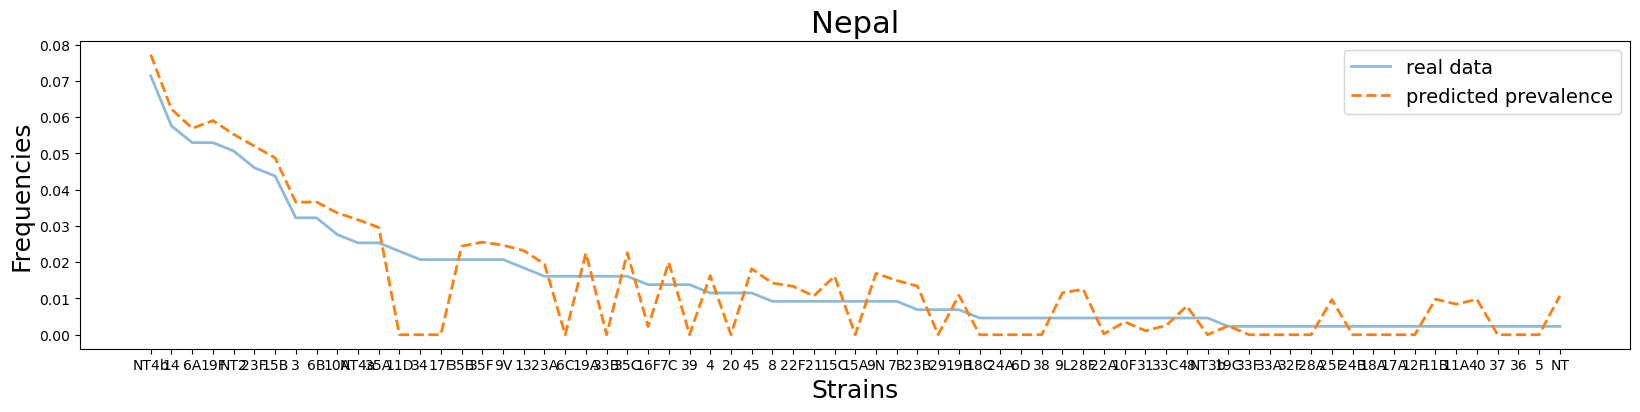

In [13]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Nepal.strain)

fig = plt.figure(figsize = (20, 4))
plt.plot(range_strain, Nepal_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Nepal', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()
#fig.savefig('Iran_estimate.png', dpi=300)